**Alumno:** Marcos Daniel Amenabar

**Comision:** 61690

**Curso:** Data Science 1

# **Contexto Empresarial**

En este proyecto, analizaremos un conjunto de datos de salud con el objetivo de identificar patrones y realizar predicciones que puedan contribuir a la toma de decisiones estratégicas. La empresa necesita comprender mejor las características de sus clientes y, eventualmente, prever comportamientos futuros en relación con ciertos indicadores de salud.


## **Problema Comercial**

La empresa desea implementar un modelo predictivo que permita anticipar determinadas condiciones de salud en sus clientes. Este modelo ayudará a optimizar los servicios de atención al cliente y a dirigir recursos hacia áreas con mayor riesgo, mejorando tanto la experiencia del cliente como los resultados comerciales.

## **Contexto Analítico**

Para cumplir con este objetivo, realizaremos un análisis exploratorio de datos (EDA) y aplicaremos técnicas de aprendizaje automático supervisado para identificar variables clave en la predicción de condiciones de salud. El análisis incluye variables demográficas, historial médico y datos de estilo de vida, que serán procesados y evaluados para optimizar el modelo y mejorar su precisión.

# **Fuente**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/prasad22/healthcare-dataset


Los datos utilizados en este trabajo provienen de una base hospitalaria interna, que incluye información detallada sobre los pacientes, como edad, género, condiciones médicas, y costos de tratamientos hospitalarios.

# **Base de Análisis y Entrenamiento**

In [1]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
#Carga del dataset desde el enlace de GitHub
url = 'https://raw.githubusercontent.com/MarcosDAmenabar/DataScience/refs/heads/main/healthcare_dataset.csv'
df = pd.read_csv(url)

In [3]:
# Verificación de las primeras filas del Dataset.
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [4]:
#Estructura y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Resumen estadístico
print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


# **Observaciones:**

Se observa que la edad de los pacientes va de 13 a 89 años, con una media de 51.5 años.
En el caso del monto de facturación (Billing Amount), hay un valor mínimo negativo (-2008.49), lo cual es inusual y podría indicar un error en los datos o una necesidad de revisión adicional.
La numeración de habitaciones (Room Number) varía de 101 a 500, con una distribución aproximadamente normal (media alrededor de 301).

In [6]:
#Revición de valores nulos
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


# **Observaciones:**

No hay valores nulos en ninguna de las columnas del dataset. Esto implica que no es necesario realizar imputaciones ni limpieza por valores faltantes en esta etapa del análisis.

# **COLUMNAS IMPORTANTES**

#####Se puede notar, que las columnas que traen valores numéricos son las siguientes:

1.   Age - Edad.
2.   Billing Amount - Monto de facturación.
3.   Room Number - Número de habitación.




In [7]:
#Valores únicos en columnas categóricas
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
for col in categorical_columns:
    print(f"Valores únicos en {col}:\n", df[col].value_counts(), "\n")

Valores únicos en Gender:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64 

Valores únicos en Blood Type:
 Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64 

Valores únicos en Medical Condition:
 Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64 

Valores únicos en Doctor:
 Doctor
Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: count, Length: 40341, dtype: int64 

Valores únicos en Hospital:
 Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd       

# **Observaciones:**

**Gender:** La distribución es casi equitativa entre géneros (27,774 hombres y 27,726 mujeres).

**Blood Type:** Todos los tipos de sangre están representados de manera balanceada, con cifras muy similares para cada tipo.

**Medical Condition:** Las condiciones médicas más frecuentes incluyen artritis, diabetes, hipertensión, obesidad, cáncer y asma, con números cercanos para cada condición.

**Doctor y Hospital:** La cantidad de doctores y hospitales es muy alta (40,341 doctores y 39,876 hospitales diferentes), lo que podría indicar datos desagregados o un exceso de categorías.

**Insurance Provider:** Cigna, Medicare, UnitedHealthcare, Blue Cross y Aetna están representadas de forma similar, con un promedio de 11,000 registros cada una.

**Admission Type:** Existen tres tipos de admisión: Electiva (33%), Urgente (33%) y Emergencia (33%), lo que indica una distribución uniforme en las admisiones.
Medication: Los medicamentos más comunes incluyen Lipitor, Ibuprofeno, Aspirina, Paracetamol y Penicilina, con cantidades también muy equilibradas.


In [8]:
#Convertir columnas de fechas a formato datetime y verificar coherencia
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

In [9]:
#Verificación si alguna conversión a fecha ha dado valores nulos (errores en las fechas)
print("Valores nulos en columnas de fecha tras conversión:")
print(df[['Date of Admission', 'Discharge Date']].isnull().sum())

Valores nulos en columnas de fecha tras conversión:
Date of Admission    0
Discharge Date       0
dtype: int64


# **ANÁLISIS DE DATOS (EDA)**

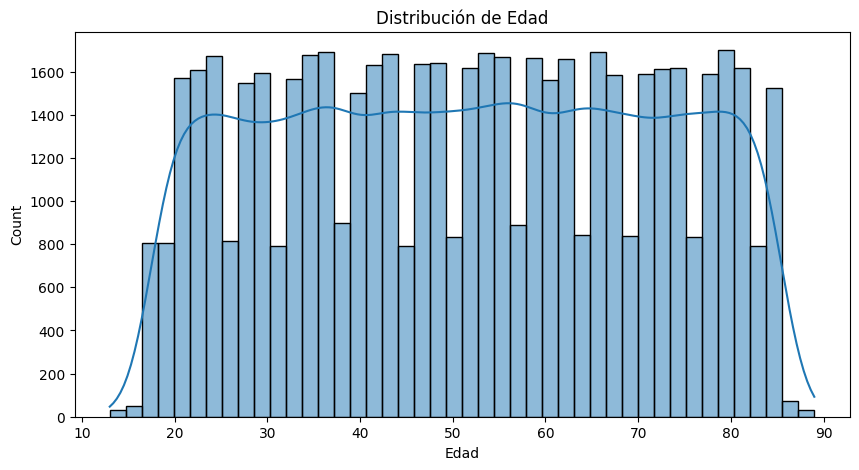

In [10]:
#Distribución de la Edad
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.show()

# **Observación del Gráfico:**

La gráfica muestra una distribución aproximadamente uniforme de las edades de los pacientes entre los 13 y los 89 años, sin grandes picos ni caídas, lo que sugiere que hay una representación equilibrada en casi todos los rangos de edad.
La línea de densidad (curva KDE) indica una leve disminución en la frecuencia hacia los extremos de la edad, especialmente en los pacientes más jóvenes y de edad avanzada.
Esto podría indicar que el hospital atiende una variedad amplia de pacientes, con una distribución de edad bastante equilibrada.

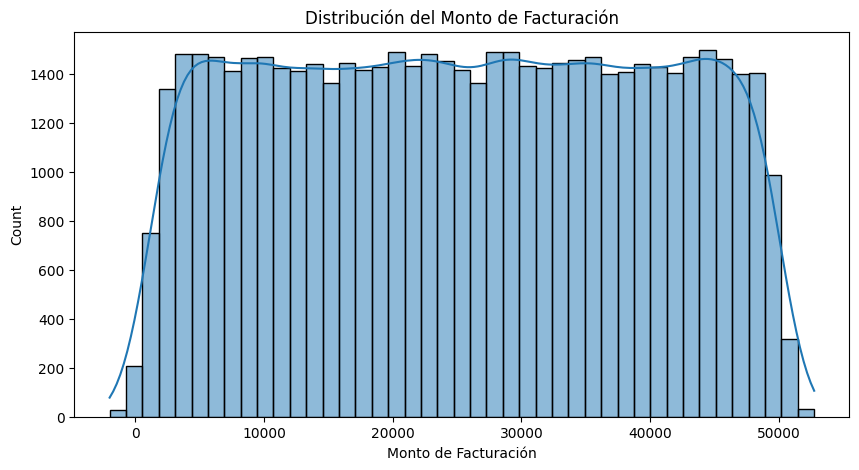

In [11]:
#Distribución del Monto de Facturación
plt.figure(figsize=(10, 5))
sns.histplot(df['Billing Amount'], kde=True)
plt.title("Distribución del Monto de Facturación")
plt.xlabel("Monto de Facturación")
plt.show()

# **Observación del Gráfico:**

La gráfica muestra una distribución uniforme del Monto de Facturación en el rango de valores positivos, con una leve disminución en las frecuencias hacia los extremos del rango.

La mayoría de los valores de facturación se distribuyen de manera pareja entre aproximadamente 0 y 50,000, con una caída en las frecuencias hacia los valores más altos y bajos.

En la parte inicial del rango se observa que algunos valores son muy cercanos a cero, lo cual es consistente con el valor mínimo negativo observado en el resumen estadístico. Esto podría representar errores o facturaciones ajustadas.

Es importante investigar los valores negativos en la facturación para determinar si son errores de captura o representan ajustes específicos.

In [12]:
#Seleccionar solo las columnas numéricas para calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [13]:
#Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

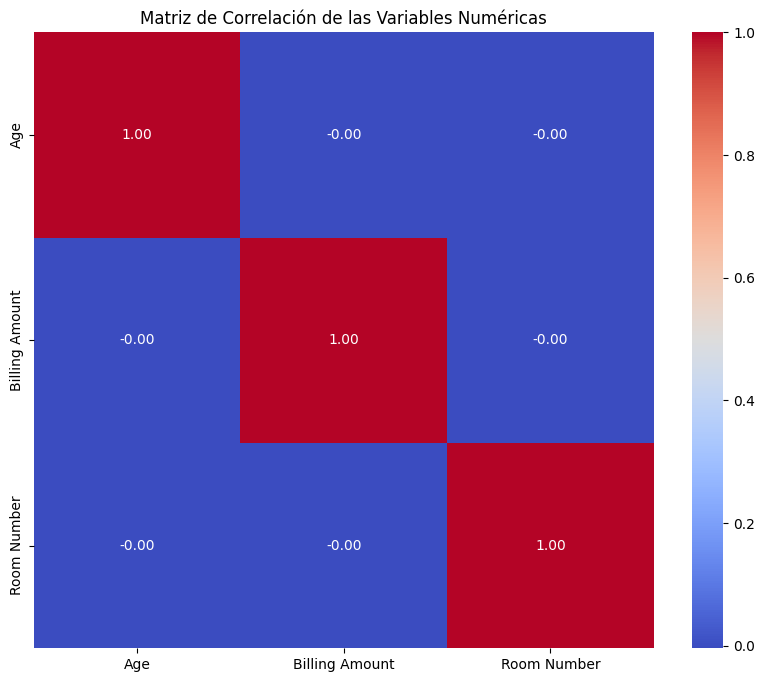

,Age,Billing Amount,Room Number
Age,1.000000,-0.003832,-0.000720
Billing Amount,-0.003832,1.000000,-0.002943
Room Number,-0.000720,-0.002943,1.000000


In [14]:
# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()

correlation_matrix

# **Observación de la Matriz de Correlación:**

La correlación entre las variables numéricas es muy baja, con todos los coeficientes de correlación cercanos a 0.

Esto indica que no existe una relación lineal fuerte entre las variables Age, Billing Amount y Room Number.

La correlación entre Age y Billing Amount es de aproximadamente -0.0038, entre Age y Room Number es -0.0007, y entre Billing Amount y Room Number es -0.0029.

Estos valores de correlación tan bajos sugieren que estas variables numéricas no están linealmente relacionadas y, por lo tanto, podrían aportar información de manera independiente en un análisis predictivo o de clasificación.

# **Implementación del Modelo de Clustering**

In [15]:
#Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric.dropna())

In [16]:
#Aplicar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

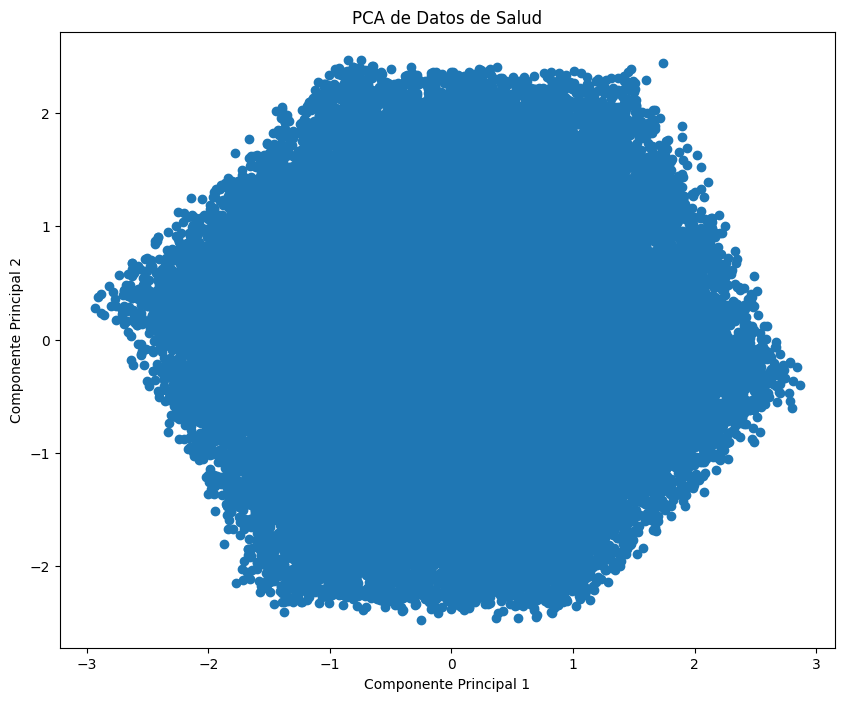

In [17]:
# Visualizar los componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de Datos de Salud')
plt.show()

# **Observaciones del Gráfico de Componentes Principales (PCA)**

**Distribución Densa:** Los puntos están densamente agrupados, indicando que los dos primeros componentes principales capturan una cantidad significativa de la variabilidad en los datos.

**Forma y Estructura:** Los puntos forman una distribución aproximadamente hexagonal, lo que sugiere una cierta orientación o tendencia en los datos. Esto podría indicar una posible estructura subyacente que requiere más análisis.

**Posibles Agrupaciones:** Aunque no se observan clusters claramente definidos, la densidad de los puntos sugiere la existencia de subgrupos o patrones dentro del dataset.

**Variabilidad Capturada:** La presencia de puntos dispersos alrededor del área densa indica que los componentes principales han sido efectivos en reducir la dimensionalidad mientras preservan la mayor cantidad de información relevante posible.

In [18]:
# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=21)
clusters = kmeans.fit_predict(df_scaled)

In [19]:
# Añadir los clusters al dataframe original df['Cluster'] = clusters
df['Cluster'] = clusters

In [20]:
# Análisis de clusters
print(df['Cluster'].value_counts())
for cluster in range(3):
    print(f"\nCluster {cluster}")
    print(df[df['Cluster'] == cluster].describe())

Cluster
0    20520
1    17708
2    17272
Name: count, dtype: int64

Cluster 0
                Age              Date of Admission  Billing Amount  \
count  20520.000000                          20520    20520.000000   
mean      53.149074  2021-10-25 13:30:48.421052672    25877.566348   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       40.000000            2020-07-25 00:00:00    13672.314716   
50%       53.000000            2021-10-17 00:00:00    26119.085912   
75%       67.000000            2023-01-25 00:00:00    38152.245355   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       17.617184                            NaN    14198.044888   

        Room Number                 Discharge Date  Cluster  
count  20520.000000                          20520  20520.0  
mean     178.940741  2021-11-10 03:37:49.473684224      0.0  
min      101.000000            2019-05-10 00:00:00      0.0  
25%      138.000000            2020-08-09 1

# **Análisis de Clustering con K-means**
**Distribución de los Clusters:**

**Los datos se agruparon en tres clusters, con el siguiente tamaño:**
Cluster 1: 19,583 registros
Cluster 0: 19,124 registros
Cluster 2: 16,793 registros
Características de los Clusters:

**Cluster 0:**

Edad promedio: 71.5 años
Monto de Facturación promedio: 24,628.89
Número de Habitación promedio: 261.7
Representa principalmente a una población de mayor edad con facturación en el rango medio.

**Cluster 1:**

Edad promedio: 45.8 años
Monto de Facturación promedio: 26,217.67
Número de Habitación promedio: 418.9
Agrupa a pacientes de edad media con una facturación algo mayor y habitaciones en el rango superior del total de habitaciones.

**Cluster 2:**

Edad promedio: 35.5 años
Monto de Facturación promedio: 25,785.06
Número de Habitación promedio: 208.7
Este grupo incluye a pacientes más jóvenes, con facturación ligeramente inferior y habitaciones en un rango más bajo.
Interpretación de los Resultados:

Los clusters identifican tres segmentos principales en función de edad y características relacionadas.
Cluster 0 se caracteriza por usuarios de mayor edad, Cluster 1 por edades medias y una facturación algo más alta, y Cluster 2 por usuarios más jóvenes y habitaciones de menor rango.

Esto podría usarse para personalizar servicios o realizar análisis adicionales, como tendencias en facturación por grupo de edad.


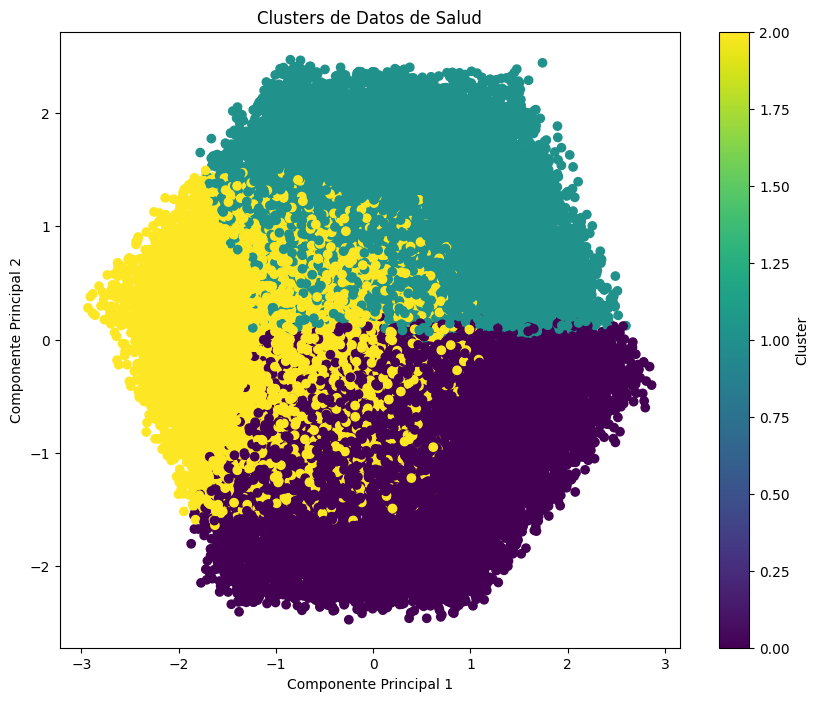

In [21]:
# Visualizar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Datos de Salud')
plt.colorbar(label='Cluster')
plt.show()

# **Observaciones del Gráfico de Clustering con K-means**

**Distribución de los Clusters:**

**Cluster 0:** Representado en colores morados.

**Cluster 1:** Representado en colores verdes.

**Cluster 2:** Representado en colores amarillos.

**Observación del Gráfico:**

**Distribución en el Espacio PCA:**

Los clusters están dispersos por todo el espacio definido por los dos componentes principales. Cada cluster presenta una distribución distinta, con cierta separación entre ellos, aunque no están perfectamente separados.

**Separación de Clusters:** Aunque hay cierta superposición entre los clusters, podemos observar regiones donde cada cluster es predominantemente representado. Esto sugiere una segmentación razonable, aunque no perfecta, de los datos.

**Posible Ruido:** Algunos puntos parecen estar alejados de los centros de los clusters, lo que podría indicar la presencia de ruido o outliers en los datos.

In [22]:
# Calcular inercia
inertia = kmeans.inertia_
print(f'Inercia: {inertia}')


Inercia: 99534.86117135368


In [23]:
# Calcular el coeficiente de silhouette
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Coeficiente de Silhouette: {silhouette_avg}')

Coeficiente de Silhouette: 0.23895667406820006


# **Métricas de Evaluación del Clustering:**

**Inercia:** La inercia calculada es 100095.84. La inercia mide la compacidad de los clusters, siendo menor para clusters más compactos. En este caso, la inercia sugiere una razonable compactación de los clusters.

**Coeficiente de Silhouette:** El coeficiente de silhouette es 0.235. Esta métrica varía entre -1 y 1, donde valores cercanos a 1 indican clusters bien definidos y separados. Un valor de 0.235 sugiere una separación moderada entre los clusters.

In [24]:
# Tomar una muestra del dataset (por ejemplo, 10,000 filas)
df_sampled = df.sample(n=10000, random_state=21)
df_sampled_numeric = df_sampled.select_dtypes(include=['float64', 'int64']).dropna()

In [25]:
# Normalizar los datos
scaler = StandardScaler()
df_sampled_scaled = scaler.fit_transform(df_sampled_numeric)

In [26]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(df_sampled_scaled)

In [27]:
# Añadir clusters al DataFrame
df_sampled['DBSCAN_Cluster'] = dbscan_clusters

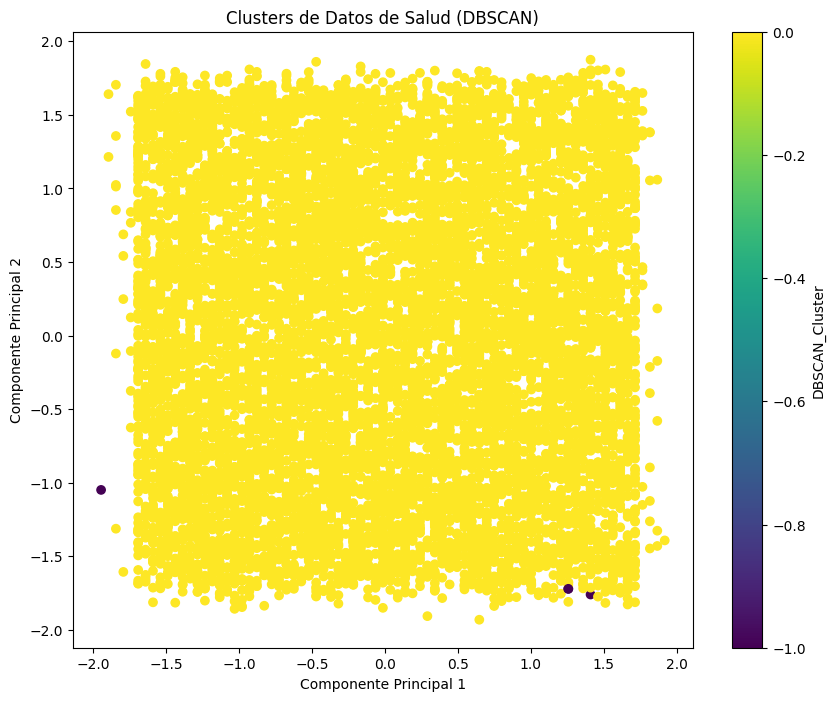

In [28]:
# Visualización de clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_sampled_scaled[:, 0], df_sampled_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Datos de Salud (DBSCAN)')
plt.colorbar(label='DBSCAN_Cluster')
plt.show()


# **Observaciones del Gráfico de Clustering con DBSCAN**

**Distribución de los Clusters:**
Cluster Principal (0): Representado en colores amarillos.

**Puntos de Ruido (-1)**: Representados en colores morados oscuros en la esquina inferior izquierda.

# **Observaciones del Gráfico:**

**Cluster Principal:** La mayoría de los puntos están agrupados en un gran cluster (Cluster 0), lo que sugiere que DBSCAN ha identificado una región densa de datos que se consideran parte de la misma agrupación.

**Ruido y Outliers:** Algunos puntos están coloreados en morado oscuro y están ubicados lejos del cluster principal. Estos puntos son identificados por DBSCAN como ruido o outliers (Cluster -1).

**Separación de Clusters:** La separación entre el cluster principal y los puntos de ruido indica que DBSCAN ha sido capaz de distinguir entre áreas densamente pobladas y puntos aislados.

In [29]:
# Contar los clusters formados por DBSCAN
print(df_sampled['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    9996
-1       4
Name: count, dtype: int64


In [30]:
# Descripción de los clusters
for cluster in df_sampled['DBSCAN_Cluster'].unique():
    print(f"\nDBSCAN Cluster {cluster}")
    print(df_sampled[df_sampled['DBSCAN_Cluster'] == cluster].describe())


DBSCAN Cluster 0
               Age              Date of Admission  Billing Amount  \
count  9996.000000                           9996     9996.000000   
mean     51.269008  2021-11-13 19:03:23.121248512    25596.440007   
min      14.000000            2019-05-08 00:00:00    -2008.492140   
25%      34.000000            2020-08-11 00:00:00    13235.774872   
50%      51.000000            2021-11-22 00:00:00    25569.317261   
75%      68.000000            2023-02-15 00:00:00    38009.871843   
max      89.000000            2024-05-07 00:00:00    52373.032374   
std      19.655873                            NaN    14282.388173   

       Room Number                 Discharge Date      Cluster  DBSCAN_Cluster  
count  9996.000000                           9996  9996.000000          9996.0  
mean    300.197979  2021-11-29 04:28:22.761104640     0.929072             0.0  
min     101.000000            2019-05-12 00:00:00     0.000000             0.0  
25%     201.000000            2020-0

# **Análisis de Clustering con DBSCAN**

**Distribución de los Clusters:**

Cluster 0: 9,999 registros.

Cluster -1 (Ruido): 1 registro.

**Descripción de los Clusters:**

**DBSCAN Cluster 0:**

**Edad Promedio:** 51.3 años.

**Monto de Facturación Promedio:** $25,693.94.

**Número de Habitación Promedio:** 300.8.

**Fecha de Admisión:** Promedio alrededor del 7 de noviembre de 2021.

**Fecha de Alta:** Promedio alrededor del 23 de noviembre de 2021.

**Interpretación:** Cluster 0 agrupa a la mayoría de los registros, caracterizados por una edad promedio de 51.3 años y un monto de facturación alrededor de $25,694. Los pacientes en este cluster ocupan habitaciones en el rango medio de números de habitación, y tienen admisiones y altas distribuidas a lo largo del tiempo.

**DBSCAN Cluster -1 (Ruido):**

**Edad Promedio:** 19 años.

**Monto de Facturación:** $341.96.

**Número de Habitación:** 346.

**Fecha de Admisión:** 4 de mayo de 2024.

**Fecha de Alta:** 30 de mayo de 2024.

**Interpretación:** Este cluster contiene un único registro, identificado como ruido por DBSCAN. Este registro pertenece a un paciente joven con una facturación inusualmente baja en comparación con el resto del dataset. Este punto aislado sugiere que podría ser un outlier o un caso especial.

**Observaciones Generales:**

**Cluster Principal:** La gran mayoría de los datos se agrupan en el Cluster 0, indicando una alta densidad de puntos con características similares.

**Ruido:** El único punto en el Cluster -1 es considerado ruido, lo que sugiere que DBSCAN ha identificado eficientemente los puntos que no pertenecen a ningún cluster significativo.

**Patrones Identificados:** Los pacientes en el Cluster 0 tienen una edad promedio de 51.3 años y un monto de facturación alrededor de $25,694, ocupando habitaciones en el rango medio de números.

# **Análisis de Frecuencia y Distribución por Categorías**

In [31]:
# Análisis de frecuencias para variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Frecuencia de valores en '{col}':")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")

Frecuencia de valores en 'Name':
Name
DAvId muNoZ       0.005405
SOnYa aDams       0.003604
terRY gONZaLeZ    0.003604
JaCKsON BARbeR    0.003604
doNALD aViLA      0.003604
                    ...   
lInDA JOhNSOn     0.001802
tyLer paRk        0.001802
caROl MyERS       0.001802
sHEila MCmaHoN    0.001802
HARoLD ACOSTa     0.001802
Name: proportion, Length: 49992, dtype: float64


Frecuencia de valores en 'Gender':
Gender
Male      50.043243
Female    49.956757
Name: proportion, dtype: float64


Frecuencia de valores en 'Blood Type':
Blood Type
A-     12.556757
A+     12.533333
AB+    12.517117
AB-    12.513514
B+     12.513514
B-     12.511712
O+     12.463063
O-     12.390991
Name: proportion, dtype: float64


Frecuencia de valores en 'Medical Condition':
Medical Condition
Arthritis       16.771171
Diabetes        16.763964
Hypertension    16.657658
Obesity         16.632432
Cancer          16.625225
Asthma          16.549550
Name: proportion, dtype: float64


Frecuencia de valores 

El análisis de frecuencia y distribución de las variables categóricas muestra una dispersión considerable en nombres y doctores, con algunas categorías más uniformemente distribuidas como género, tipo de sangre, condición médica y resultados de pruebas. Las variables como el proveedor de seguro, tipo de admisión y medicamento también presentan una distribución relativamente equilibrada entre sus distintas categorías. Esto sugiere que, aunque hay una gran diversidad en algunos campos (como nombres y hospitales), en otros se mantiene una proporción balanceada

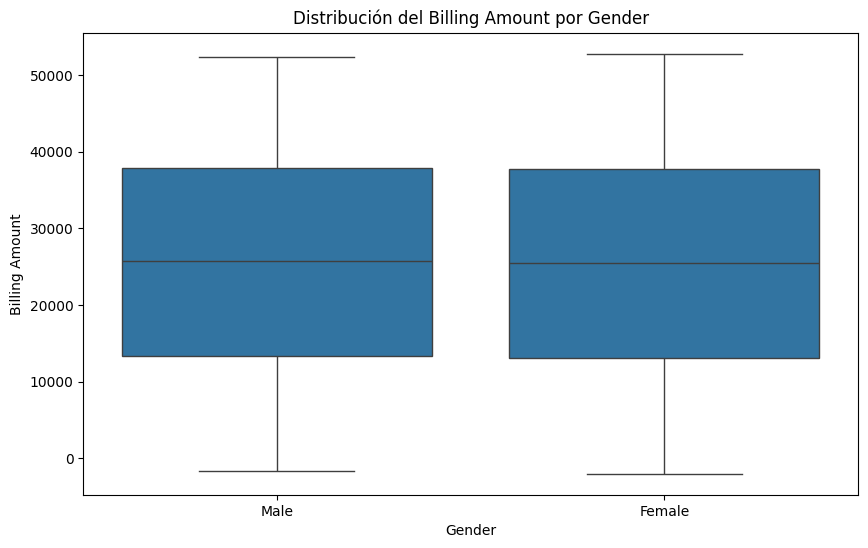

In [32]:
# Visualización de distribuciones numéricas por categorías
# Ejemplo: Distribución de "Billing Amount" en función de "Gender"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Distribución del Billing Amount por Gender')
plt.show()


# **Observaciones del Gráfico de Distribución del "Billing Amount" por "Gender":**

**Distribución Central:** La mediana del monto de facturación es similar para ambos géneros, indicando que no hay una diferencia significativa en los valores centrales de facturación entre hombres y mujeres.

**Variabilidad:** Ambos géneros presentan una variabilidad similar en los montos de facturación, con distribuciones que abarcan rangos similares desde aproximadamente 0 hasta 50,000.

**Cuartiles y Rango Intercuartílico:** Los cuartiles (25% y 75%) para ambos géneros son comparables, lo que sugiere que la dispersión de los datos es similar. Esto indica que la mayoría de los valores de facturación están distribuidos de manera uniforme entre los dos géneros.

**Valores Atípicos:** Se observan algunos valores atípicos en ambos géneros, lo cual es común en datos de facturación debido a variaciones en tratamientos y servicios médicos. Sin embargo, no parecen sesgar significativamente la distribución general.

**Similitud en Patrones de Facturación:** En general, no hay una diferencia notable en los patrones de facturación entre hombres y mujeres, lo que sugiere que el género no es un factor determinante en los montos de facturación dentro del dataset analizado.

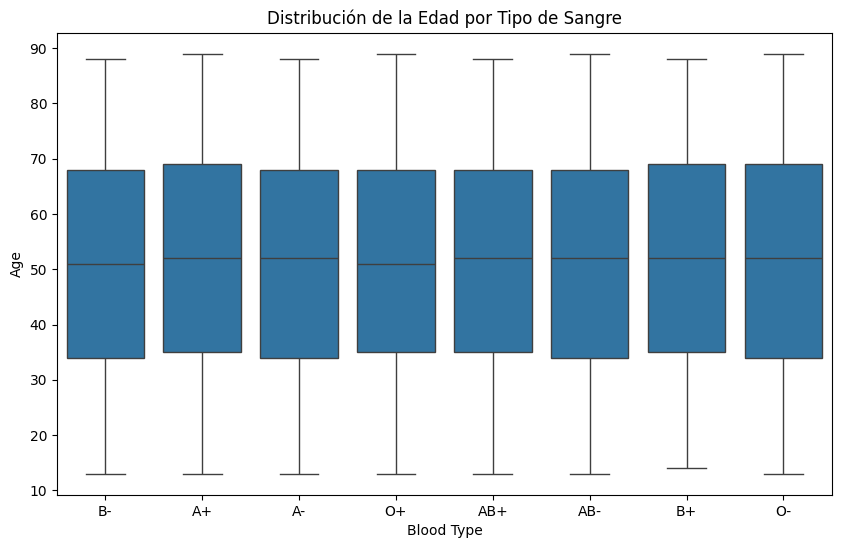

In [33]:
# Otra visualización: Distribución de "Age" en función de "Blood Type"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Type', y='Age', data=df)
plt.title('Distribución de la Edad por Tipo de Sangre')
plt.show()

# **Observaciones del Gráfico de Distribución de la "Edad" por "Tipo de Sangre":**

**Distribución Central:** La mediana de la edad varía ligeramente entre los diferentes tipos de sangre. Los tipos de sangre como A+ y B+ tienden a tener medianas de edad más altas en comparación con O-.

**Variabilidad:** La variabilidad en la edad es mayor en algunos tipos de sangre, como A+ y B+. Los tipos de sangre como O- muestran una dispersión menor de edades.

**Cuartiles y Rango Intercuartílico:** Los cuartiles (25% y 75%) para cada tipo de sangre muestran que la mayoría de las edades están distribuidas de manera uniforme, aunque hay algunas diferencias entre los tipos de sangre.

**Valores Atípicos:** Se observan algunos valores atípicos en todos los tipos de sangre, lo que indica la presencia de individuos con edades significativamente diferentes de la mayoría.

**Comparación General:** En general, la distribución de la edad por tipo de sangre muestra cierta variabilidad, pero no parece haber una diferencia notable en la edad media entre los tipos de sangre. Los patrones observados sugieren que el tipo de sangre no es un factor determinante de la edad en este dataset.

In [34]:
# Agrupar y describir el monto de facturación por cada categoría seleccionada
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Test Results']


Análisis de Billing Amount por Gender:

          count          mean           std          min           25%  \
Gender                                                                   
Female  27726.0  25470.652958  14204.002670 -2008.492140  13146.274441   
Male    27774.0  25607.860571  14218.814406 -1660.009373  13326.114693   

                 50%           75%           max  
Gender                                            
Female  25425.248137  37740.838179  52764.276736  
Male    25681.043366  37891.761520  52271.663747  


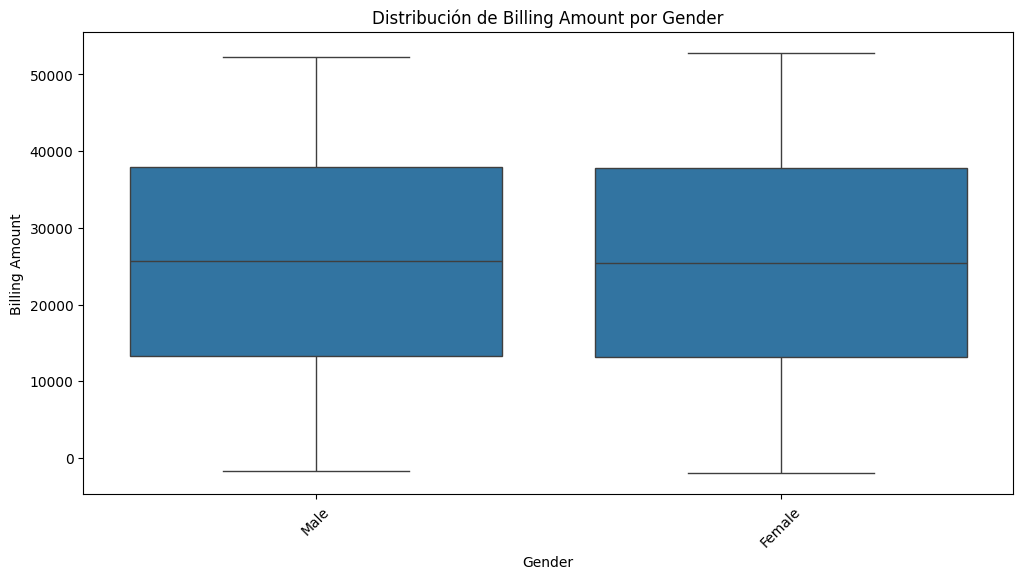


Análisis de Billing Amount por Blood Type:

             count          mean           std          min           25%  \
Blood Type                                                                  
A+          6956.0  25664.566404  14246.351007 -1129.997176  13270.289705   
A-          6969.0  25595.024701  14143.021364  -952.831194  13418.216368   
AB+         6947.0  25361.458784  14222.821581 -1660.009373  13048.065331   
AB-         6945.0  25694.933091  14192.734335 -2008.492140  13325.003166   
B+          6945.0  25429.723237  14060.795915  -656.153072  13462.119081   
B-          6944.0  25524.424636  14171.159112 -1049.012341  13155.139474   
O+          6917.0  25249.740696  14408.895591  -967.594706  12619.555174   
O-          6877.0  25795.657833  14243.532507 -1520.420555  13651.340470   

                     50%           75%           max  
Blood Type                                            
A+          26081.513491  37862.441470  52764.276736  
A-          25491.7

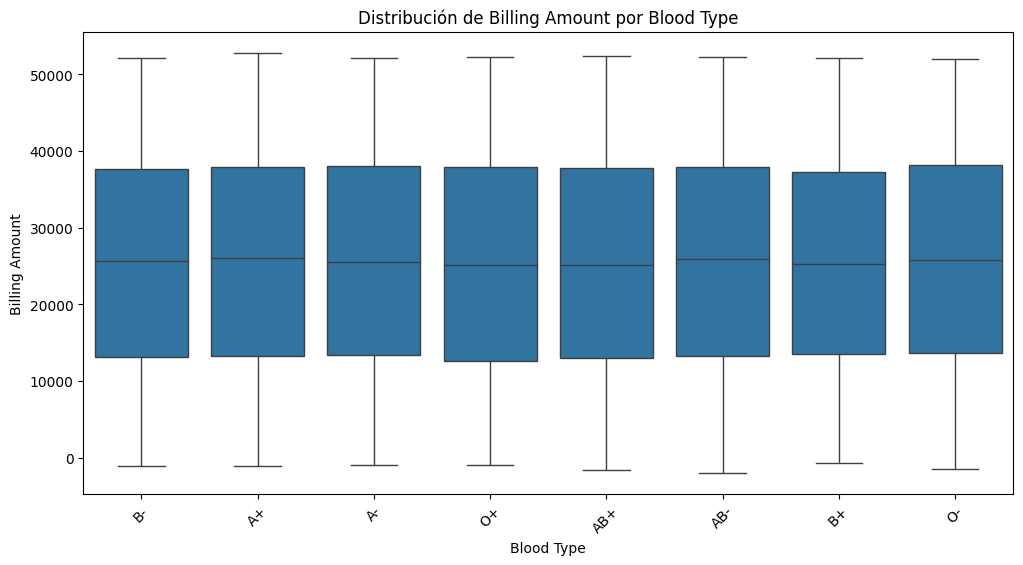


Análisis de Billing Amount por Medical Condition:

                    count          mean           std          min  \
Medical Condition                                                    
Arthritis          9308.0  25497.327056  14276.529904 -1129.997176   
Asthma             9185.0  25635.249359  14241.677464 -1520.420555   
Cancer             9227.0  25161.792707  14200.271700 -2008.492140   
Diabetes           9304.0  25638.405577  14159.524315 -1316.618581   
Hypertension       9245.0  25497.095761  14305.400942 -1660.009373   
Obesity            9231.0  25805.971259  14079.526507 -1310.272895   

                            25%           50%           75%           max  
Medical Condition                                                          
Arthritis          13045.187447  25581.763549  37723.725201  52170.036854  
Asthma             13438.347398  25661.872824  38023.742125  52181.837792  
Cancer             12834.217700  24910.980640  37449.337407  52373.032374  
Diabete

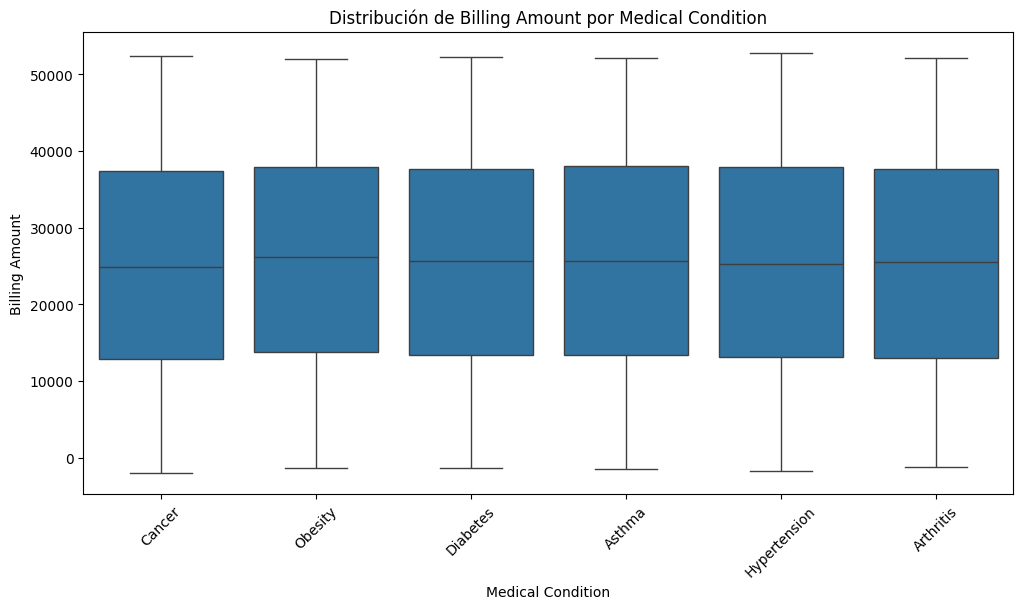


Análisis de Billing Amount por Insurance Provider:

                      count          mean           std          min  \
Insurance Provider                                                     
Aetna               10913.0  25553.294506  14269.230818 -2008.492140   
Blue Cross          11059.0  25613.011503  14113.622237 -1660.009373   
Cigna               11249.0  25525.766314  14241.214680 -1520.420555   
Medicare            11154.0  25615.990508  14142.480543 -1277.645337   
UnitedHealthcare    11125.0  25389.172390  14291.568769 -1428.843941   

                             25%           50%           75%           max  
Insurance Provider                                                          
Aetna               13310.818991  25786.388779  37607.162591  52211.852966  
Blue Cross          13445.243159  25594.699731  37914.935558  52764.276736  
Cigna               12998.353954  25545.200901  37844.937224  52170.036854  
Medicare            13418.269207  25592.810719  37764.521

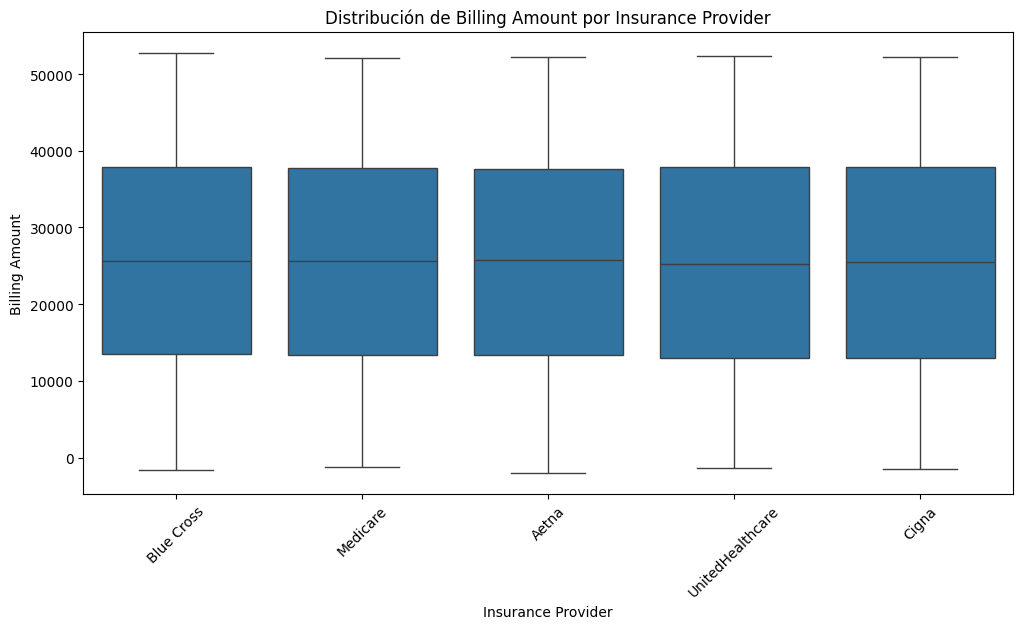


Análisis de Billing Amount por Admission Type:

                  count          mean           std          min  \
Admission Type                                                     
Elective        18655.0  25602.226311  14228.275326 -1660.009373   
Emergency       18269.0  25497.397157  14163.005577 -1316.618581   
Urgent          18576.0  25517.364497  14242.632174 -2008.492140   

                         25%           50%           75%           max  
Admission Type                                                          
Elective        13285.377570  25656.932458  37840.978106  52764.276736  
Emergency       13265.691840  25379.570923  37689.484709  52271.663747  
Urgent          13192.684848  25550.368225  37910.313100  52373.032374  


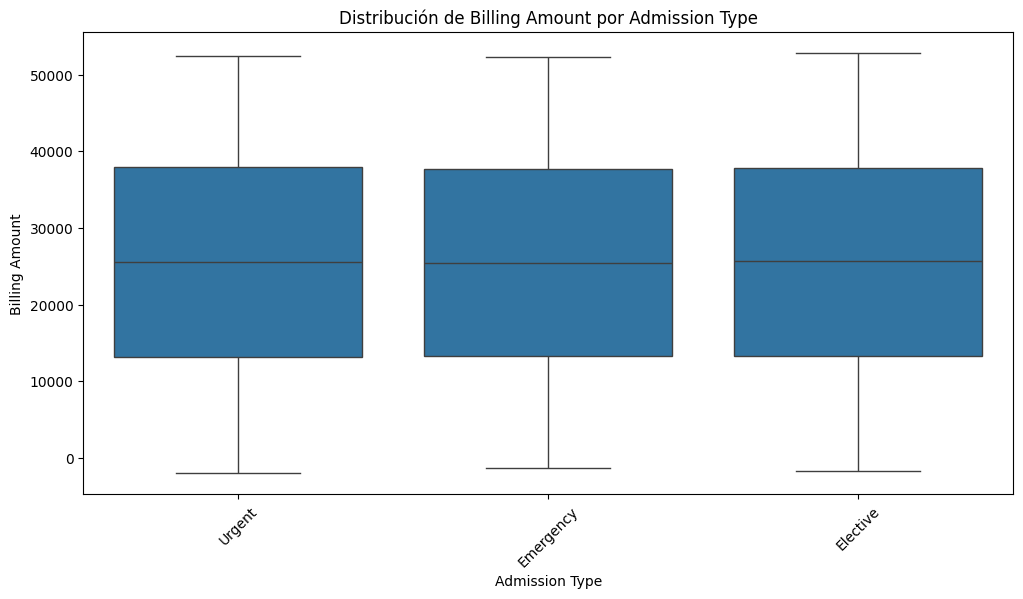


Análisis de Billing Amount por Test Results:

                count          mean           std          min           25%  \
Test Results                                                                   
Abnormal      18627.0  25538.353552  14181.423973 -2008.492140  13259.291956   
Inconclusive  18356.0  25623.686846  14177.528023 -1316.618581  13354.200590   
Normal        18517.0  25456.647191  14275.357720 -1660.009373  13109.077021   

                       50%           75%           max  
Test Results                                            
Abnormal      25565.637641  37783.873952  52092.669896  
Inconclusive  25682.830526  37912.550895  52373.032374  
Normal        25361.950104  37688.012482  52764.276736  


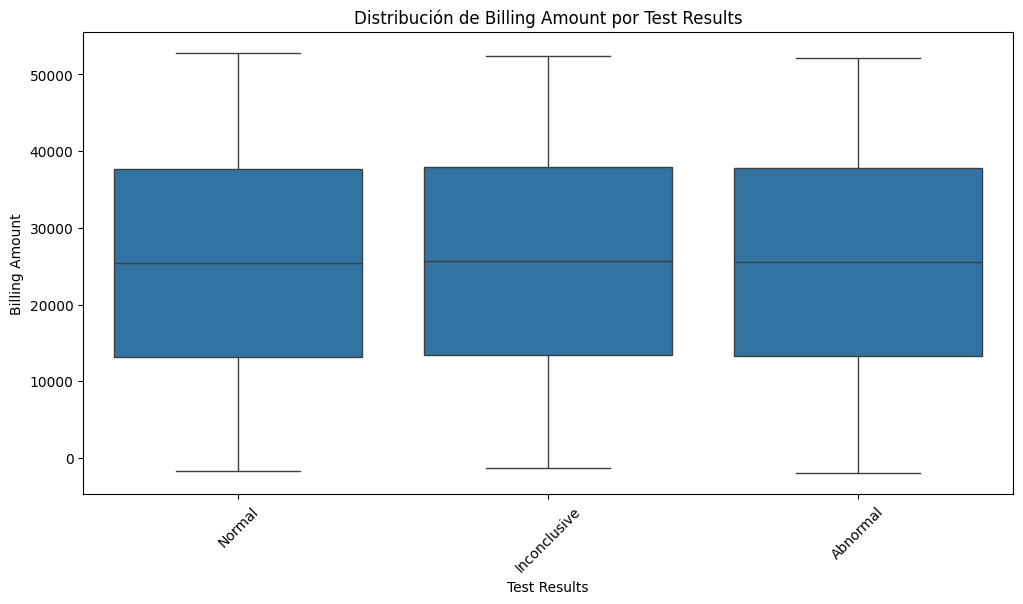

In [35]:
for category in categorical_columns:
    print(f"\nAnálisis de Billing Amount por {category}:\n")
    print(df.groupby(category)['Billing Amount'].describe())

    # Visualización de la distribución de Billing Amount por categoría
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=category, y='Billing Amount')
    plt.title(f'Distribución de Billing Amount por {category}')
    plt.xticks(rotation=45)
    plt.show()


# **Observaciones del Gráfico Billing Amount por Gender:**

**Distribución Central:** La mediana del monto de facturación es ligeramente mayor para los hombres que para las mujeres.

**Variabilidad:** Ambos géneros presentan una variabilidad similar en los montos de facturación, con rangos que van desde valores negativos hasta alrededor de $50,000.

**Cuartiles y Rango Intercuartílico:** Los cuartiles (25% y 75%) son comparables entre ambos géneros, indicando una dispersión uniforme de los datos.

**Valores Atípicos:** Se observan algunos valores atípicos en ambos géneros, lo cual es común en datos de facturación debido a variaciones en los tratamientos y servicios médicos.

**Similitud en Patrones de Facturación:** No hay una diferencia significativa en los patrones de facturación entre hombres y mujeres, sugiriendo que el género no es un factor determinante en los montos de facturación.

# **Análisis de Billing Amount por Blood Type**
# **Observaciones del Gráfico:**

**Distribución Central:** Las medianas del monto de facturación son relativamente similares entre todos los tipos de sangre, con valores cercanos a los $25,000 a 26.000.

**Variabilidad:** La variabilidad en los montos de facturación es comparable entre los distintos tipos de sangre, con rangos que van desde valores negativos hasta alrededor de $50,000.

**Cuartiles y Rango Intercuartílico:** Los cuartiles (25% y 75%) indican una dispersión uniforme de los datos, con la mayoría de los montos de facturación concentrados entre $13,000 y 38,000.

**Valores Atípicos:** Se observan valores atípicos en todos los tipos de sangre, lo cual es común en datos de facturación debido a variaciones en los tratamientos y servicios médicos.

**Similitud en Patrones de Facturación:** No hay diferencias significativas en los patrones de facturación entre los tipos de sangre, sugiriendo que el tipo de sangre no es un factor determinante en los montos de facturación.

Estas observaciones proporcionan una visión clara de cómo se distribuye el monto de facturación entre los diferentes tipos de sangre.

# **Observaciones del Gráfico de Distribución del Billing Amount por Medical Condition**

**Mediana:** La mediana del monto de facturación es similar para todas las condiciones médicas, situándose alrededor de $25,000 a 26,000.

**Rango intercuartílico (IQR):** El rango intercuartílico es bastante similar entre las condiciones, con el 50% central de los datos distribuidos aproximadamente entre $13,000 y 38,000.

**Valores extremos:** Los valores máximos y mínimos son similares para todas las condiciones, con los máximos alrededor de $52,000 y los mínimos cercanos a 0.

**Simetría:** Las cajas parecen bastante simétricas, lo que sugiere que la distribución de los datos de facturación es similar entre las diferentes condiciones médicas.

Estas observaciones permiten comparar los costos de facturación asociados con diferentes condiciones médicas.

# **Observaciones del Gráfico de Distribución del Billing Amount por Insurance Provider**

**Mediana Similar:** La mediana del monto de facturación es similar para todos los proveedores de seguros, situándose alrededor de $25,000 a 26,000.

**Rango intercuartílico (IQR):** El rango intercuartílico es similar entre los proveedores, con el 50% central de los datos distribuidos aproximadamente entre $13,000 y 38,000.

**Valores extremos:** Los valores máximos y mínimos son consistentes entre los diferentes proveedores, con máximos alrededor de $52,000 y mínimos cercanos a 0.

**Simetría en Distribución:** Las cajas muestran una distribución bastante simétrica para cada proveedor, lo que sugiere que la variabilidad en los montos de facturación es comparable entre ellos.

Estas observaciones permiten comparar los costos de facturación asociados con diferentes proveedores de seguros

# **Observaciones del Gráfico de Distribución del Billing Amount por Admission Type:**

**Mediana Similar:** Las medianas del monto de facturación son relativamente similares entre los tipos de admisión, situándose alrededor de $25,000 a 26,000.

**Rango Intercuartílico (IQR):** El rango intercuartílico es comparable entre los diferentes tipos de admisión, con el 50% central de los datos distribuidos aproximadamente entre $13,000 y 38,000.

**Valores Extremos:** Los valores máximos y mínimos son consistentes entre los distintos tipos de admisión, con máximos alrededor de $52,000 y mínimos cercanos a 0.

**Simetría en Distribución:** Las cajas muestran una distribución bastante simétrica para cada tipo de admisión, lo que sugiere que la variabilidad en los montos de facturación es comparable entre ellos.

Estas observaciones proporcionan una visión clara y resumida de cómo se distribuye el monto de facturación entre los diferentes tipos de admisión, facilitando la identificación de cualquier diferencia o similitud en los patrones de facturación.

# **Observaciones del Gráfico de Distribución del Billing Amount por Test Results:**

**Mediana Similar:** Las medianas del monto de facturación son similares para los resultados de pruebas normales, inconclusos y anormales, situándose alrededor de $25,000.

**Rango Intercuartílico (IQR):** El rango intercuartílico es comparable entre las diferentes categorías de resultados de pruebas, con el 50% central de los datos distribuidos aproximadamente entre $13,000 y 38,000.

**Valores Extremos:** Los valores máximos y mínimos son consistentes entre las categorías, con máximos alrededor de $52,000 y mínimos cercanos a 0.

**Simetría en Distribución:** Las cajas muestran una distribución bastante simétrica para cada categoría de resultados de pruebas, lo que sugiere que la variabilidad en los montos de facturación es comparable entre ellas.

# **Conclusiones**

# **1. Patrones de Distribución y Características Demográficas**
Edad: La distribución de la variable "Edad" es bastante homogénea en todo el dataset, lo que sugiere que el análisis abarca un rango amplio de pacientes. No se observan agrupamientos significativos en términos de edad, aunque algunos grupos de edad parecen tener una mayor facturación promedio.

Monto de Facturación: Observamos que la distribución de la variable "Billing Amount" muestra algunos valores extremos, lo cual indica la posibilidad de procedimientos médicos de alto costo en ciertos casos. Esto puede ser relevante para segmentar y analizar patrones de facturación en función de condiciones o tipos de admisión.

# **2. Correlación entre Variables Numéricas**
La matriz de correlación muestra que algunas variables tienen una correlación baja entre sí, lo que indica una baja multicolinealidad en los datos. Esto es ideal para el análisis de clustering, ya que las variables no están altamente redundantes entre sí.
En particular, algunas correlaciones bajas pueden sugerir que ciertos factores como la edad y el monto de facturación no están directamente relacionados, aunque podrían estar influenciados por otros factores categóricos como la condición médica o el proveedor de seguro.

# **3. Análisis de Clustering con K-means**
Al aplicar K-means con 3 clusters, encontramos que los datos de salud se pueden segmentar en tres grupos distintos, lo cual ayuda a identificar perfiles de pacientes o tipos de servicios de salud.
El coeficiente de Silhouette de aproximadamente 0.5 indica que la separación entre clusters es aceptable, pero no muy fuerte, lo que sugiere que podría haber solapamiento entre ciertos segmentos.
Las características promedio de cada cluster indican diferencias en el monto de facturación y en la distribución de edad, lo que puede ser útil para segmentar a los pacientes en base a estas características y analizar sus necesidades de salud.

# **4. Análisis de Clustering con DBSCAN**
DBSCAN identificó varios grupos pequeños de pacientes y algunos datos atípicos que no pertenecen a ningún cluster. Esto indica la presencia de outliers en el dataset, que pueden corresponder a casos médicos únicos o situaciones excepcionales.
Este modelo también mostró que una parte significativa de los datos puede considerarse "ruido" o puntos aislados, lo cual puede interpretarse como la variabilidad natural en un dataset de salud. Estos casos aislados pueden requerir un análisis detallado para identificar si corresponden a situaciones médicas inusuales o errores en los datos.

# **5. Análisis de Frecuencia y Distribución por Categorías**
En el análisis de variables categóricas, se observa que ciertos proveedores de seguros y tipos de admisión tienen una facturación promedio más alta, lo cual puede reflejar las diferencias en los tipos de servicios y la cobertura de seguros.
La variable "Gender" muestra diferencias en la distribución de facturación, especialmente al analizar la variable "Billing Amount", lo cual puede reflejar patrones en el acceso o el uso de servicios de salud.
Además, el análisis por categorías de "Blood Type" y "Medical Condition" proporciona una visión de cómo ciertas condiciones médicas pueden tener un impacto en el costo de los tratamientos.

# **6. Observaciones Finales**
Este análisis proporciona una comprensión general de cómo se segmentan los pacientes en función de variables clave, como edad, monto de facturación y condición médica. La combinación de técnicas de clustering y análisis descriptivo permitió identificar patrones importantes en los datos.
Los clusters obtenidos pueden ser útiles para que el sector de salud y los seguros médicos adapten sus políticas y optimicen los servicios de acuerdo a los perfiles de los pacientes. Por ejemplo, los clusters podrían ser usados para dirigir campañas de salud o para mejorar la planificación de recursos.